In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.signal import savgol_filter

In [62]:
data = pd.read_csv('Sorghum_2022_reflectance.csv', dtype={'Leaf_Num' : 'category', 'Leaf_pos' : 'category'})

In [65]:
data

ASD_Label  Genotype  Rep  Leaf_num Leaf_pos       350       351  \
0      1-1-1-3         1    1         1        3  0.067603  0.097000   
1      1-2-2-1         1    2         2        1  0.086900  0.111040   
2      1-2-3-3         1    2         3        3  0.090700  0.074000   
3      1-2-1-2         1    2         1        2  0.097900  0.112459   
4      1-2-3-2         1    2         3        2  0.100644  0.106306   
...        ...       ...  ...       ...      ...       ...       ...   
1056  68-2-1-3        68    2         1        3  0.078500  0.082700   
1057  68-2-2-2        68    2         2        2  0.079200  0.102198   
1058  68-1-3-1        68    1         3        1  0.091900  0.074300   
1059  68-1-3-2        68    1         3        2  0.101184  0.123986   
1060  68-1-1-1        68    1         1        1  0.106218  0.103361   

           352     353       354  ...      2491      2492      2493      2494  \
0     0.104572  0.0956  0.089000  ...  0.072200  0.071300  0.070700  0.069800   
1     0.103771  0.0802  0.091000  ...  0.059800  0.060100  0.059700  0.058400   
2     0.066400  0.0781  0.097600  ...  0.068200  0.065967  0.065500  0.065100   
3     0.103933  0.0905  0.118572  ...  0.150094  0.149474  0.149433  0.150717   
4     0.097900  0.0850  0.098500  ...  0.051200  0.050941  0.050500  0.049700   
...        ...     ...       ...  ...       ...       ...       ...       ...   
1056  0.079500  0.0629  0.035300  ...  0.061900  0.062000  0.061600  0.060600   
1057  0.107509  0.0896  0.073100  ...  0.056300  0.055500  0.055000  0.054400   
1058  0.067500  0.0673  0.053425  ...  0.068300  0.067300  0.066900  0.066400   
1059  0.116085  0.0831  0.059100  ...  0.066400  0.065163  0.064500  0.064900   
1060  0.089700  0.0720  0.060900  ...  0.067400  0.067400  0.067282  0.068000   

          2495      2496      2497      2498      2499      2500  
0     0.069483  0.070500  0.070100  0.068500  0.068300  0.068400  
1     0.057900  0.057200  0.057000  0.058400  0.058300  0.057200  
2     0.064900  0.066700  0.066800  0.065400  0.064600  0.062800  
3     0.150821  0.150798  0.150168  0.148169  0.147093  0.145641  
4     0.049500  0.049623  0.049200  0.048500  0.048277  0.047548  
...        ...       ...       ...       ...       ...       ...  
1056  0.060100  0.058900  0.058600  0.060400  0.060100  0.058300  
1057  0.054274  0.054787  0.054700  0.054600  0.054600  0.054132  
1058  0.065800  0.065400  0.065200  0.065000  0.064815  0.065700  
1059  0.064700  0.064200  0.063800  0.063200  0.062900  0.062400  
1060  0.068093  0.067815  0.067400  0.066500  0.066000  0.065400  

[947 rows x 2156 columns]

In [13]:
data.Genotype.dtype

CategoricalDtype(categories=['1', '10', '11', '12', '13', '15', '16', '17', '18', '19',
                  '2', '4', '6', '7', '8', '9', '20', '21', '22', '23', '24',
                  '26', '27', '28', '29', '30', '31', '32', '33', '34', '35',
                  '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
                  '46', '48', '49', '51', '53', '54', '55', '56', '57', '58',
                  '59', '60', '61', '62', '63', '64', '65', '66', '67', '68'],
                 ordered=False)

In [67]:
data=data.loc[data['Rep'].isin(['1','2']), :]

In [68]:
data.value_counts('Rep')

Rep
1    485
2    462
dtype: int64

In [70]:
data=data.groupby(['Genotype', 'Rep']).mean()

In [71]:
data.to_csv('spectrum.csv')

In [5]:
data = data.loc[data['350'] > 0 , :]

In [6]:
data =savgol_filter(data.iloc[:, 5:2500], window_length=5 , polyorder = 2)

In [7]:
data = pd.DataFrame(data)

 ...]

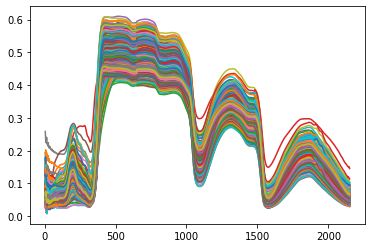

In [8]:
plt.plot(data.iloc[ : , 5:2500].T)

In [10]:
data.head()

0         1         2         3         4         5         6     \
0  0.069828  0.092940  0.103403  0.098188  0.086815  0.074398  0.064490   
1  0.092970  0.099917  0.100723  0.088090  0.086965  0.095803  0.098080   
2  0.090880  0.073020  0.068260  0.079994  0.092783  0.092860  0.083309   
3  0.103956  0.101154  0.101513  0.100429  0.110894  0.119732  0.112358   
4  0.104387  0.099431  0.096073  0.089464  0.097949  0.117314  0.126117   

       7         8         9     ...      2141      2142      2143      2144  \
0  0.062169  0.057034  0.045914  ...  0.072123  0.071437  0.070573  0.069811   
1  0.085213  0.076121  0.082486  ...  0.059971  0.060023  0.059537  0.058631   
2  0.069429  0.057580  0.054986  ...  0.067871  0.066404  0.065343  0.064957   
3  0.101355  0.093691  0.095966  ...  0.149960  0.149478  0.149711  0.150412   
4  0.100969  0.067717  0.055621  ...  0.051223  0.050937  0.050403  0.049806   

       2145      2146      2147      2148      2149      2150  
0  0.069783  0.070246  0.069896  0.068817  0.068389  0.068303  
1  0.057754  0.057166  0.057360  0.058091  0.057986  0.057409  
2  0.065371  0.066366  0.066637  0.065717  0.064489  0.062803  
3  0.150952  0.150822  0.149906  0.148477  0.147087  0.145593  
4  0.049551  0.049525  0.049158  0.048649  0.048132  0.047595  

[5 rows x 2151 columns]